In [1]:
#Step 1 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Load and display the dataset
df = pd.read_csv(r"C:\Users\chauh\Documents\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv", encoding='cp1252')
print(df.head())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1        Date  
0  23952.0     NaN       NaN  27-07-2023  
1  23934.0     NaN       NaN  

In [6]:
# Step 3: Rename some columns for clarity
df.rename(columns={
    'Marital_St': 'Marital_Status',
    'Product_C': 'Product_Category',
    'Age Group': 'Age_Group',
    'Cust_name': 'Customer_Name'
}, inplace=True)

In [7]:
#Step 4: Data Cleaning
# Drop useless columns
df.drop(columns=['unnamed1', 'Status'], inplace=True, errors='ignore')

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)

# Handle missing values 
df.dropna(inplace=True)

# Create a readable Marital Status column
df['Marital_Label'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})

# Total purchase amount already exists as "Amount"
df['Amount_per_Order'] = df['Amount'] / df['Orders']

In [9]:
#Step 5: ------PLOTS----
# Basic information
# Total metrics
total_orders = df['Orders'].sum()
total_sales = df['Amount'].sum()
unique_customers = df['User_ID'].nunique()

# Average Order Value (AOV)
avg_order_value = total_sales / total_orders

# Revenue per Customer
revenue_per_customer = total_sales / unique_customers

# Profit (Assuming 25% margin)
profit_margin = 0.25
profit = total_sales * profit_margin

# Print all results
print("Total Orders:", total_orders)
print("Total Sales (Amount): ₹", round(total_sales, 2))
print("Unique Customers:", unique_customers)
print("Average Order Value (₹):", round(avg_order_value, 2))
print("Revenue per Customer (₹):", round(revenue_per_customer, 2))
print("Estimated Profit (₹):", round(profit, 2))


Total Orders: 27981
Total Sales (Amount): ₹ 106249132.43
Unique Customers: 3752
Average Order Value (₹): 3797.19
Revenue per Customer (₹): 28318.0
Estimated Profit (₹): 26562283.11


C:\Users\chauh\AppData\Local\Temp\ipykernel_3776\417252564.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Amount', data=df, estimator=sum, ci=None)


Text(0.5, 1.0, 'Total Sales by Gender')

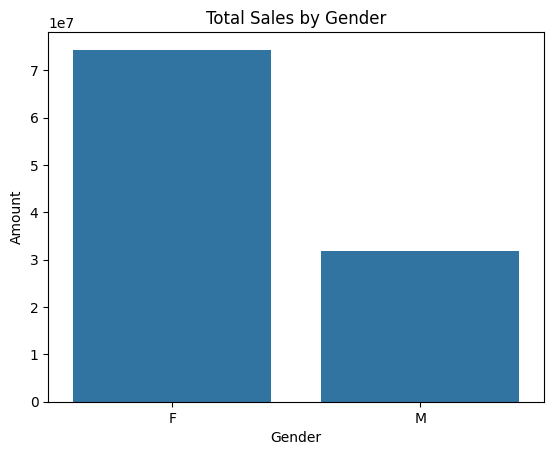

In [10]:
# (a) Sales by Gender 
sns.barplot(x='Gender', y='Amount', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Gender')

C:\Users\chauh\AppData\Local\Temp\ipykernel_3776\4125646026.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'Age_Group' , y= 'Amount', data= df, estimator=sum, ci= None , hue= 'Gender')


Text(0.5, 1.0, 'Sales by Age Group')

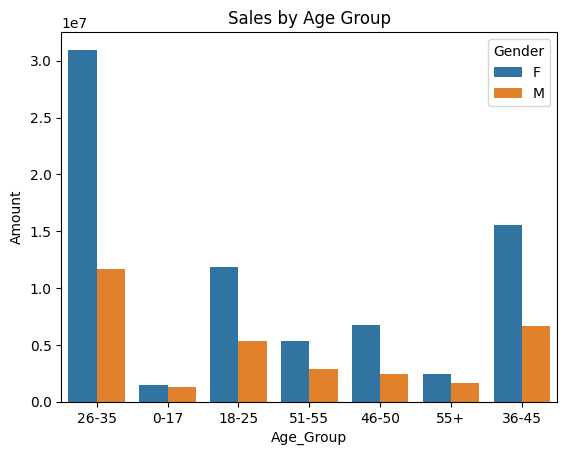

In [12]:
#(b) Sales by Age Group
sns.barplot(x= 'Age_Group' , y= 'Amount', data= df, estimator=sum, ci= None , hue= 'Gender')
plt.title('Sales by Age Group')

Text(0.5, 1.0, 'Total Sales by State')

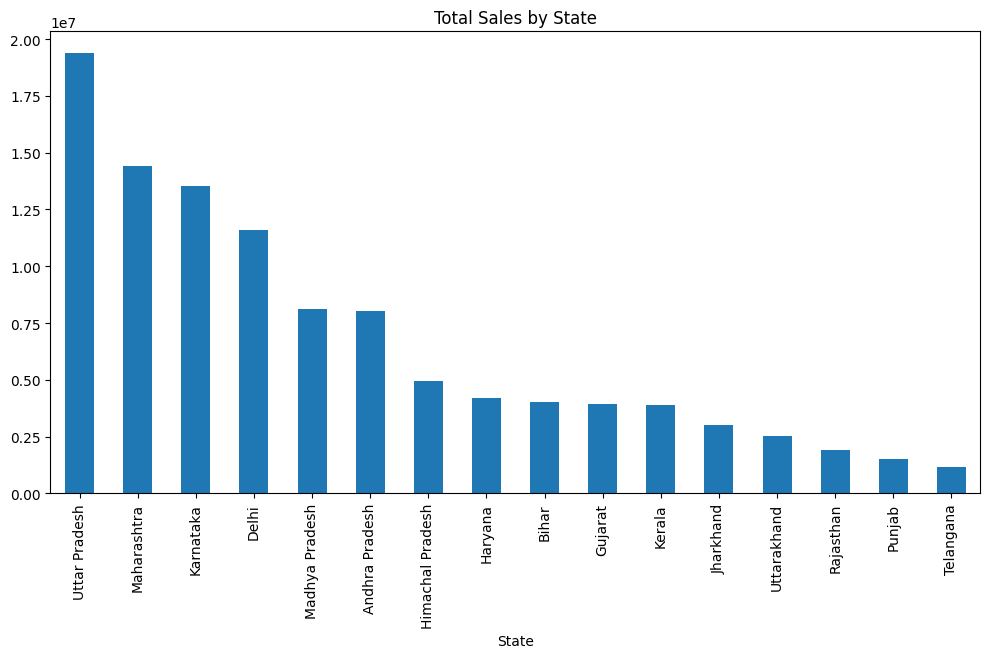

In [13]:
# (c)Sales by State
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by State')

Text(0.5, 1.0, 'Top 10 Product Categories by Sales')

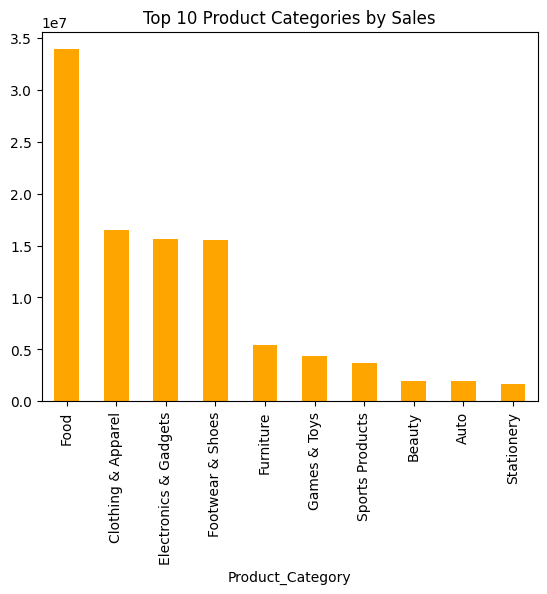

In [14]:
#(d) Top 10 Product Categories
top_categories = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head(10)
top_categories.plot(kind='bar', color='orange')
plt.title('Top 10 Product Categories by Sales')

Text(0.5, 1.0, 'Orders by Occupation')

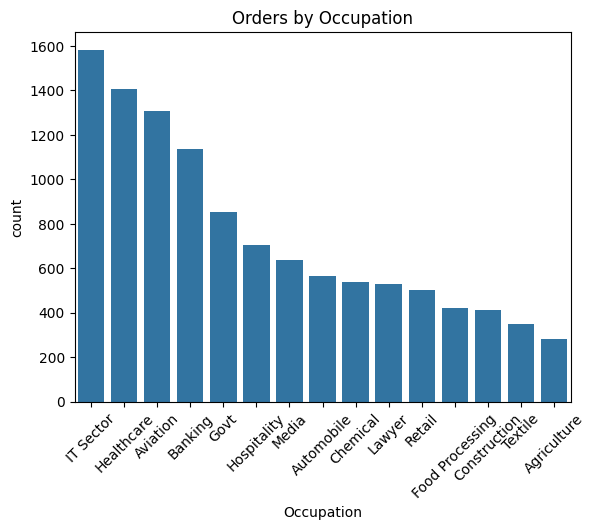

In [15]:
# (e) Occupation vs Orders
sns.countplot(data=df, x='Occupation', order=df['Occupation'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Orders by Occupation")

C:\Users\chauh\AppData\Local\Temp\ipykernel_3776\2496719373.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Zone', y='Amount', estimator=sum, ci=None)


Text(0.5, 1.0, 'Zone-wise Total Sales')

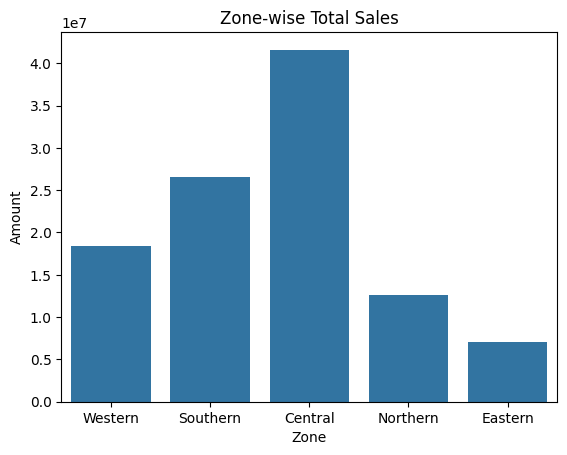

In [16]:
# (f) Zone-Wise Sales
sns.barplot(data=df, x='Zone', y='Amount', estimator=sum, ci=None)
plt.title('Zone-wise Total Sales')

C:\Users\chauh\AppData\Local\Temp\ipykernel_3776\2472347284.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Marital_Status', y='Amount', estimator=sum, ci=None)


Text(0.5, 1.0, 'Sales by Marital Status')

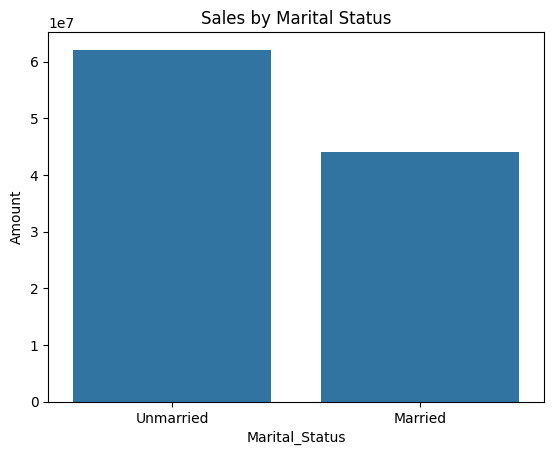

In [18]:
# (g) Sales by Material Status
df['Marital_Status'] = df['Marital_Status'].map({0: 'Unmarried', 1: 'Married'})
sns.barplot(data=df, x='Marital_Status', y='Amount', estimator=sum, ci=None)
plt.title('Sales by Marital Status')

Text(0.5, 1.0, 'Daily Sales Trend')

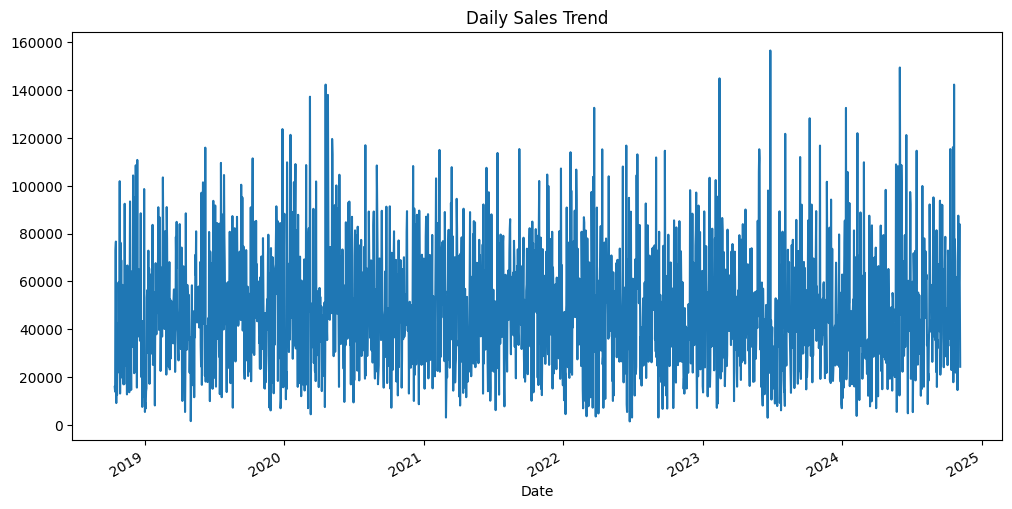

In [19]:
# (h) Sales Trend Over Time
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce') 
sales_by_date = df.groupby('Date')['Amount'].sum()
sales_by_date.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend')

<Axes: >

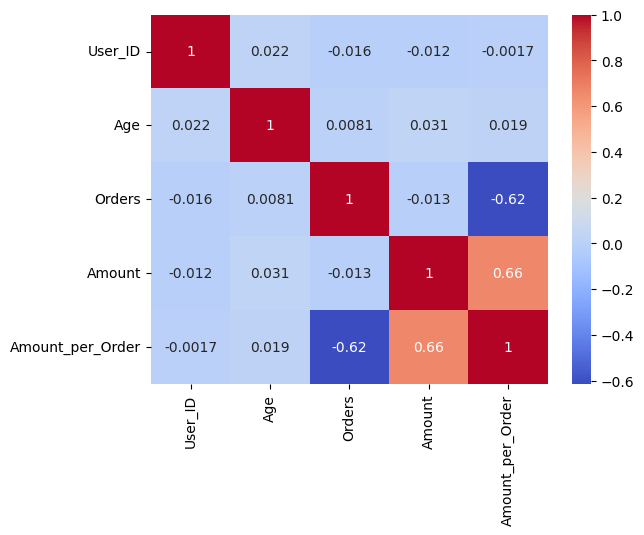

In [20]:
# (i) Heatmap of Correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')